# Simulating MIMIC Patient (No Sepsis)
We used Pulse to simulate patients in MIMIC (without adding the Sepsis condition), initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. The idea is to compare patient trajectories for identical patients with and without Sepsis. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. 

In [1]:
import pandas as pd
icustayid = 34541.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,64.65428122828418,6629.589443795697,13.462977901619118,37.00621132331747,59.408885375053906,33.27241631459346,103.44827586206893,0.04999999999999938,78.75266996995761,0.9741894593784619,19.8675496688742,0.0,95.6512182708684,7.271906e+09
1,68.3971926895191,7088.668972243771,0.323908152303489,37.29893115397675,57.547953280957536,33.643492913136285,93.74999999999996,0.0,79.11214021752207,0.9734990449424442,20.40816326530615,10800.000000142898,98.49454772729868,7.271916e+09
2,62.649858219909795,7216.69854510975,34.26697722802681,37.30171495658658,56.91728776280954,33.654023293994626,90.90909090909086,0.0,79.19519476969617,0.9735057501123703,20.40816326530615,14400.000000221478,99.33547002923623,7.271920e+09
3,79.64976229944479,7334.629484957494,0.3249326809936441,37.30203723563301,56.034259147514646,33.662948209537454,88.23529411764703,0.6680000000000001,79.36942416426253,0.9735252649100706,20.40816326530615,18000.000000300057,100.49028338895303,7.271924e+09
4,91.99009125161292,9868.498958102167,28.797407122205946,37.2674884118922,44.81316078611147,33.70367162084748,58.823529411764675,-0.03500000000000003,82.78949039463457,0.9737192039390876,20.134228187919494,21600.000000378637,121.0100243445633,7.271927e+09


In [4]:
len(simulation)

51

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

51

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
972,1.0,34541.0,7.271906e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,1.046875,96.000000,0.0,0.0,0.0,0.0,9300.0,4650.0,-9300.0,1.0
973,4.0,34541.0,7.271916e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.920139,154.166667,0.0,0.0,0.0,0.0,13950.0,4650.0,-13950.0,1.0
974,5.0,34541.0,7.271920e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.900049,200.000000,0.0,0.0,0.0,0.0,18600.0,4650.0,-18600.0,1.0
975,6.0,34541.0,7.271924e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.831461,240.000000,0.0,0.0,2500.0,2500.0,23250.0,4650.0,-20750.0,1.0
976,7.0,34541.0,7.271927e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,0.0,...,0.772277,192.000000,0.0,0.0,2500.0,0.0,27900.0,4650.0,-25400.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

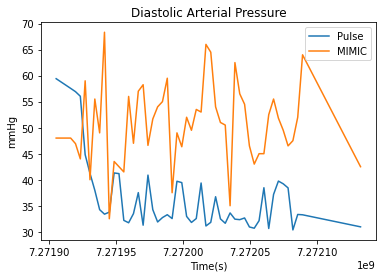

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

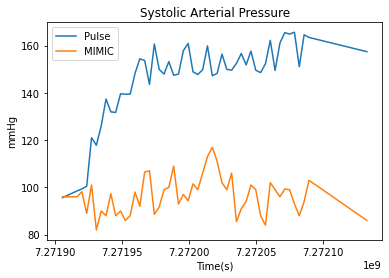

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

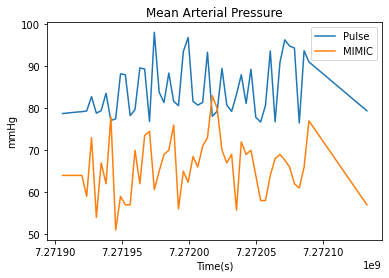

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

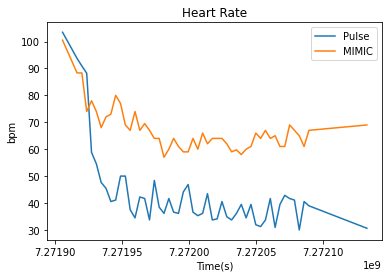

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

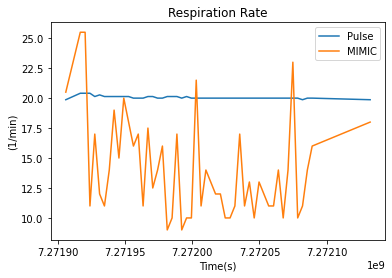

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

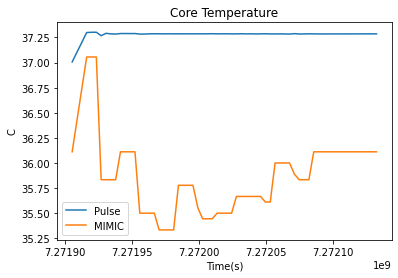

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()